# Face Detection
# Dataset is coming from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [11]:
DATASET_LOCATION = 'E:\\Data\\face\\wiki'
mat_file_name = 'wiki'

In [12]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import scipy.io

In [13]:
def load_annotation(filename):
    annotation = scipy.io.loadmat(os.path.join(DATASET_LOCATION + '\\', '{:s}.mat'.format(filename)))
    return annotation

In [15]:
mat_file = load_annotation(mat_file_name)

In [62]:
mat_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]]), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 array(['Michael 

In [81]:
# parsing arrays inside arrays in mat file  
df = pd.DataFrame()
for k,v in mat_file.items():
    #print(k)
    #print(len(v))
    if (k == 'wiki'):
        dob = v[0][0][0]
        photo_taken = v[0][0][1]
        full_path = v[0][0][2]
        gender = v[0][0][3]
        name = v[0][0][4]
        face_location = v[0][0][5]
        face_score = v[0][0][6]
        second_face_score = v[0][0][7]
        df['dob'] = dob[0]
        df['photo_taken'] = photo_taken[0]
        df['full_path'] = full_path[0]
        df['gender'] = gender[0]
        df['name'] = name[0]
        df['face_location'] = face_location[0]
        df['face_score'] = face_score[0]
        df['second_face_score'] = second_face_score[0]
df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
...,...,...,...,...,...,...,...,...
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN
62324,711338,1970,[32/9997032_1947-07-30_1970.jpg],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN
62326,723893,2011,[00/9999400_1981-12-13_2011.jpg],1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                62328 non-null  int32  
 1   photo_taken        62328 non-null  uint16 
 2   full_path          62328 non-null  object 
 3   gender             59685 non-null  float64
 4   name               62328 non-null  object 
 5   face_location      62328 non-null  object 
 6   face_score         62328 non-null  float64
 7   second_face_score  4096 non-null   float64
dtypes: float64(3), int32(1), object(3), uint16(1)
memory usage: 3.2+ MB


In [79]:
df.describe().T

E:\Software\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
dob,62328.0,7.166810e+05,10832.627367,4077.000000,710673.000000,719269.000000,724702.250000,736011.000000
photo_taken,62328.0,1.998766e+03,20.907937,1940.000000,1992.750000,2009.000000,2012.000000,2015.000000
gender,59685.0,7.885231e-01,0.408359,0.000000,1.000000,1.000000,1.000000,1.000000
face_score,62328.0,-inf,NaN,-inf,NaN,2.463949,3.760014,7.081268
second_face_score,4096.0,2.009050e+00,0.981277,0.731419,1.164925,1.839065,2.655757,5.463147


In [136]:
#random_image_file = '65/10001965_1930-05-23_1961.jpg'
random_image_file = '09/9998109_1972-12-27_2013.jpg'

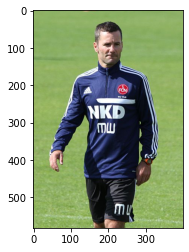

In [137]:
img = cv2.imread(DATASET_LOCATION + '\\' + random_image_file)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<class 'pandas.core.series.Series'>
Michael Wiesinger


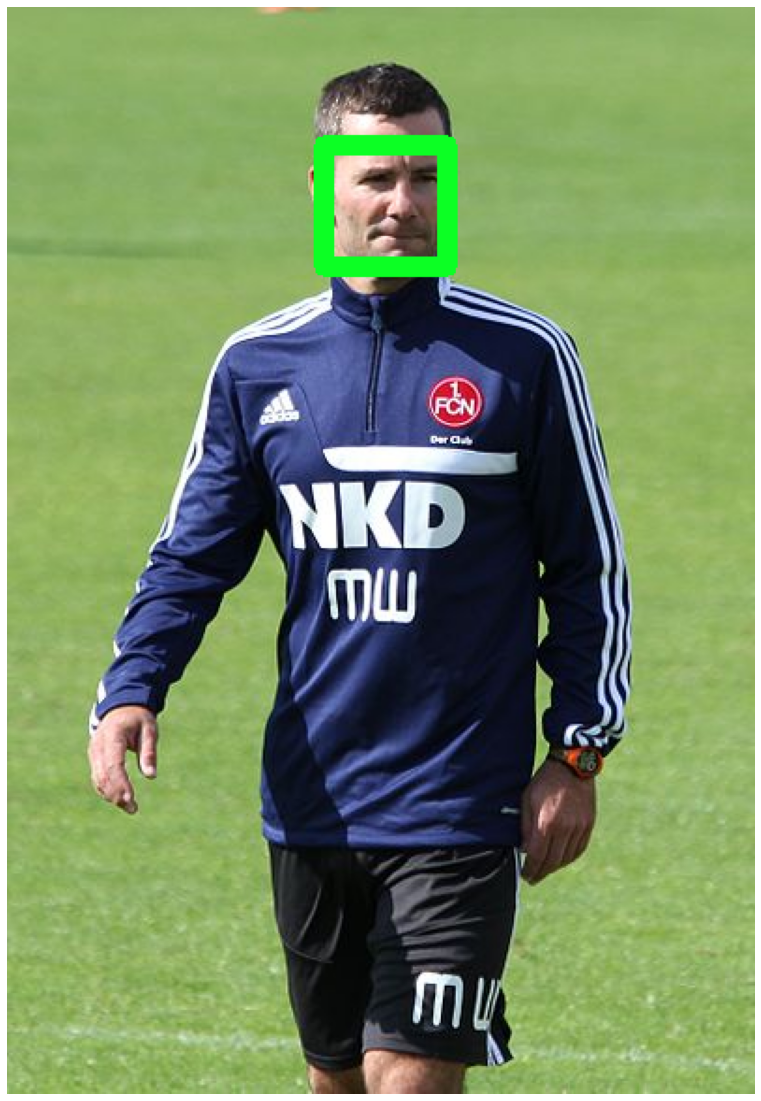

In [145]:
obj = df.loc[df.full_path == random_image_file, 'face_location']
print(type(obj))
face_location_list = obj.tolist()
x0 = face_location_list[0][0][0]
y0 = face_location_list[0][0][1]
x1 = face_location_list[0][0][2]
y1 = face_location_list[0][0][3]
start_point = (int(x0), int(y0))
end_point = (int(x1), int(y1))
label = df.loc[df.full_path == random_image_file, 'name']
print(label.tolist()[0][0])
img = cv2.rectangle(img, start_point, end_point, color= (36,255,12), thickness=10)
#img = cv2.putText(img, label, (start_point[0], start_point[1]-20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 4)
fig = plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()